In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
crash_data = pd.read_csv("../Resources/Montgomery_Crash_Data.csv", index_col='Report Number')
crash_data['Crash Date/Time'] = pd.to_datetime(crash_data['Crash Date/Time'])
display(crash_data.head())
display(crash_data.tail())

,Crash Date/Time,Weather,Surface Condition,Injury Severity,Vehicle ID,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,geometry
Report Number,,,,,,,,,,,
MCP26370040,2021-04-04 12:00:00,CLEAR,DRY,NO APPARENT INJURY,88FCD6CE-A85A-4CBD-9BEC-3B6E6DCF16BB,2021,MITS,DELOCA,39.057201,-77.293102,POINT (-77.29310223 39.05720146)
MCP3221002N,2023-12-04 21:37:00,CLEAR,DRY,SUSPECTED MINOR INJURY,6E02796A-26BA-45CD-88B1-13EEDF7EC29C,2015,TOYOTA,RAV4,39.058683,-77.290703,POINT (-77.29070333 39.05868333)
MCP9399002C,2024-07-17 21:27:00,CLOUDY,WET,SUSPECTED MINOR INJURY,70D8BF87-2BB7-4092-9267-0AD9E7E42978,2004,JEEP,GRAND CHEROKEE,39.063110,-77.295795,POINT (-77.29579535000001 39.06310977)
MCP28240026,2016-06-21 09:49:00,RAIN,WET,NO APPARENT INJURY,334BEA8D-C367-4DFB-8A70-93750F1BCFBC,2008,HOND,4S,39.063192,-77.296605,POINT (-77.296605 39.06319167)
MCP2497000L,2016-12-05 06:55:00,RAIN,WET,SUSPECTED MINOR INJURY,B8B60239-5172-4024-846A-0EAFD3A7E0B2,2004,VOLVO,S60,39.063220,-77.295740,POINT (-77.29574 39.06322)


,Crash Date/Time,Weather,Surface Condition,Injury Severity,Vehicle ID,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,geometry
Report Number,,,,,,,,,,,
MCP15640017,2016-04-05 07:09:00,CLEAR,DRY,NO APPARENT INJURY,9C9FCABB-FC51-4FB7-9492-5CB74C84B3F8,2014,MERCEDES,VAN,39.156490,-76.996840,POINT (-76.99684000000001 39.15649)
MCP2827001J,2015-10-01 16:40:00,RAIN,WET,NO APPARENT INJURY,ECED2C50-ACC5-41F7-9E68-068985D14CFF,2015,UNKNOWN,UNKNOWN,39.156735,-76.996697,POINT (-76.99669667000001 39.156735)
MCP30400067,2024-05-06 15:20:00,CLEAR,DRY,SUSPECTED SERIOUS INJURY,C0635513-18DE-4782-B6A6-7BAAEE078AC3,2002,MERCURY,SABLE,39.166098,-76.998800,POINT (-76.9988 39.16609833)
MCP9366000J,2015-12-03 02:37:00,CLEAR,WET,NO APPARENT INJURY,03A7F24C-B7B2-4CC8-8EE0-747CBBB279F9,2009,VW,JETTA,39.159908,-76.989645,POINT (-76.989645 39.15990833)
MCP3226001N,2021-08-22 16:41:00,CLEAR,DRY,NO APPARENT INJURY,F3EC0E51-E67F-4869-8300-6E7F5E13FB21,2017,SUBA,4S,39.160135,-76.989293,POINT (-76.98929267 39.16013533)


In [3]:
weather_counts = crash_data['Weather'].value_counts()
display(weather_counts)

Weather
CLEAR         68691
RAIN          12144
CLOUDY         9995
OTHER          8160
SNOW            998
FOGGY           427
WINTRY MIX      381
WINDY            93
Name: count, dtype: int64

In [4]:
crash_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100889 entries, MCP26370040 to MCP3226001N
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Crash Date/Time    100889 non-null  datetime64[ns]
 1   Weather            100889 non-null  object        
 2   Surface Condition  88836 non-null   object        
 3   Injury Severity    100889 non-null  object        
 4   Vehicle ID         100889 non-null  object        
 5   Vehicle Year       100889 non-null  int64         
 6   Vehicle Make       100883 non-null  object        
 7   Vehicle Model      100864 non-null  object        
 8   Latitude           100889 non-null  float64       
 9   Longitude          100889 non-null  float64       
 10  geometry           100889 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 9.2+ MB


In [5]:
# Group by Weather and Injury Severity, then count the occurrences
severity_by_weather = crash_data.groupby(['Weather', 'Injury Severity']).size().unstack()

# Display the results
print(severity_by_weather)

Injury Severity  FATAL INJURY  NO APPARENT INJURY  SUSPECTED MINOR INJURY  \
Weather                                                                     
CLEAR                   103.0             56733.0                 11201.0   
CLOUDY                    9.0              8107.0                  1765.0   
FOGGY                     1.0               347.0                    73.0   
OTHER                     5.0              6833.0                  1271.0   
RAIN                      9.0              9876.0                  2161.0   
SNOW                      NaN               838.0                   158.0   
WINDY                     NaN                79.0                    14.0   
WINTRY MIX                1.0               304.0                    70.0   

Injury Severity  SUSPECTED SERIOUS INJURY  
Weather                                    
CLEAR                               654.0  
CLOUDY                              114.0  
FOGGY                                 6.0  
OTHER    

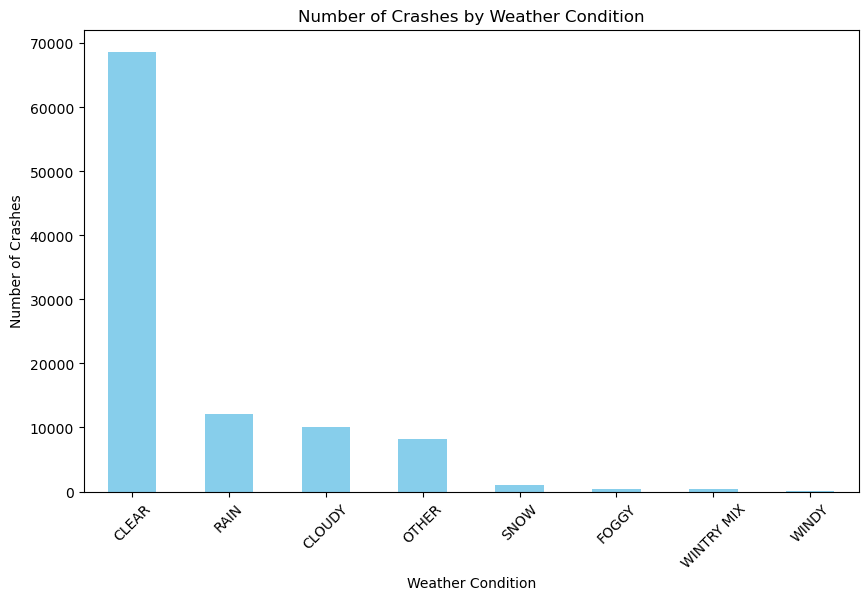

In [6]:
# Plot the number of crashes by weather condition
weather_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Crashes by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.show()

In [7]:
# Filter crashes that occurred during rain
rain_crashes = crash_data[crash_data['Weather'] == 'RAIN']

# Get statistics about rain-related crashes
print(rain_crashes.describe())

# Count the injury severity for rain-related crashes
rain_severity_counts = rain_crashes['Injury Severity'].value_counts()
print(rain_severity_counts)

                     Crash Date/Time  Vehicle Year      Latitude     Longitude
count                          12144  12144.000000  12144.000000  12144.000000
mean   2019-08-04 06:58:43.567193600   2010.274951     39.086672    -77.118177
min              2015-01-03 07:48:00   1968.000000     38.940578    -77.518708
25%              2017-04-06 12:42:45   2006.000000     39.030535    -77.194698
50%              2019-03-03 18:30:00   2011.000000     39.077843    -77.119425
75%              2022-02-07 18:00:00   2015.000000     39.142535    -77.041937
max              2024-09-25 18:16:00   2024.000000     39.335464    -76.909692
std                              NaN      6.571175      0.071232      0.095920
Injury Severity
NO APPARENT INJURY          9876
SUSPECTED MINOR INJURY      2161
SUSPECTED SERIOUS INJURY      98
FATAL INJURY                   9
Name: count, dtype: int64


Weather Category
Clear      68691
Adverse    32198
Name: count, dtype: int64


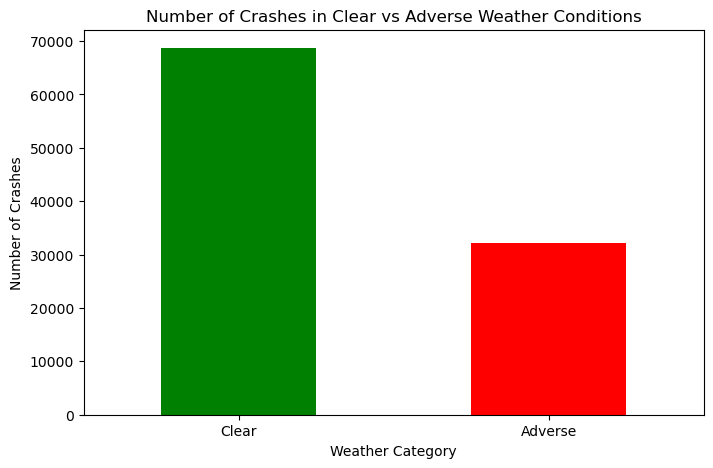

In [8]:
# Define clear and adverse weather conditions
clear_weather = ['CLEAR']
adverse_weather = ['RAIN','CLOUDY','OTHER','SNOW','FOGGY','WINTRY MIX','WINDY']

# Create a new column categorizing weather
crash_data['Weather Category'] = crash_data['Weather'].apply(
    lambda x: 'Clear' if x in clear_weather else 'Adverse'
)

# Count the number of crashes in each category
weather_category_counts = crash_data['Weather Category'].value_counts()

# Display the results
print(weather_category_counts)

# Plot the results
weather_category_counts.plot(kind='bar', figsize=(8, 5), color=['green', 'red'])
plt.title('Number of Crashes in Clear vs Adverse Weather Conditions')
plt.xlabel('Weather Category')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=0)
plt.show()

Weather
CLEAR         17.408394
CLOUDY        18.889445
FOGGY         18.735363
OTHER         16.262255
RAIN          18.675889
SNOW          16.032064
WINDY         15.053763
WINTRY MIX    20.209974
Name: Severe Accident, dtype: float64


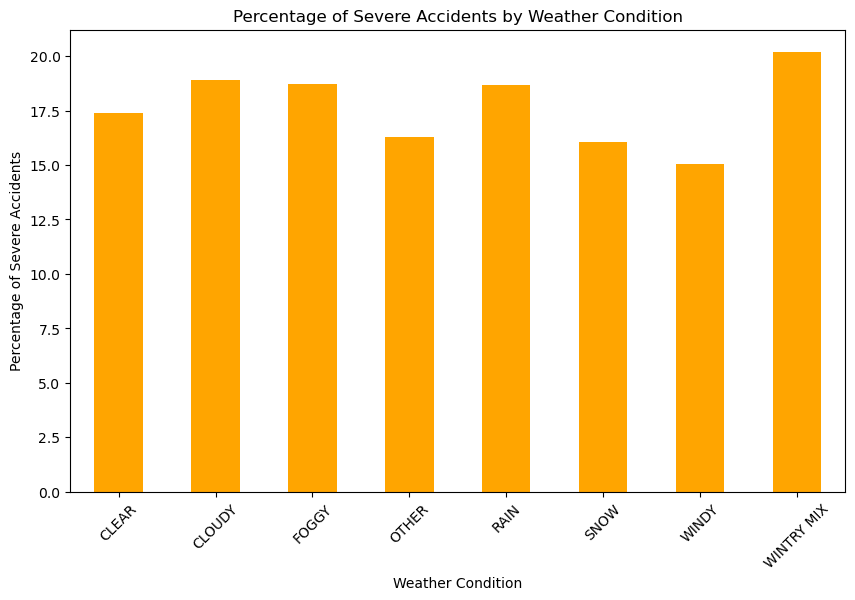

In [9]:
# Define severe accidents (for example, based on injury severity)
severe_conditions = ['FATAL INJURY', 'SUSPECTED SERIOUS INJURY', 'SUSPECTED MINOR INJURY']  # Adjust based on your Injury Severity labels

# Create a column indicating if the accident was severe
crash_data['Severe Accident'] = crash_data['Injury Severity'].apply(
    lambda x: 1 if x in severe_conditions else 0
)

# Group by weather and calculate the percentage of severe accidents
severe_accidents_by_weather = crash_data.groupby('Weather')['Severe Accident'].mean() * 100

# Display the percentage of severe accidents for each weather condition
print(severe_accidents_by_weather)

# Plot the percentage of severe accidents by weather
severe_accidents_by_weather.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Percentage of Severe Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Percentage of Severe Accidents')
plt.xticks(rotation=45)
plt.show()

In [10]:
# Prepare INJURY SEVERITY for Scatter plot by assigning it a numeric value in fibonacci sequence
injury_severity_dict = {
    'NO APPARENT INJURY': 1,
    'SUSPECTED MINOR INJURY': 2,
    'SUSPECTED SERIOUS INJURY': 3,
    'FATAL INJURY': 4
}

# Prepare WEATHER HAZARD for Scatter plot by assigning it a numeric value in fibonacci sequence
weather_hazard_dict = {
    'CLEAR': 1,
    'CLOUDY': 2,
    'WINDY': 3,
    'RAIN': 4,
    'OTHER': 5,
    'FOGGY': 6,
    'SNOW': 7,
    'WINTRY MIX': 8
}

# Create new columns for Scatter Plot
crash_data['INJURY CODE'] = crash_data['Injury Severity'].map(injury_severity_dict)
crash_data['WEATHER CODE'] = crash_data['Weather'].map(weather_hazard_dict)

display(crash_data.head())
display(crash_data.tail())


,Crash Date/Time,Weather,Surface Condition,Injury Severity,Vehicle ID,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,geometry,Weather Category,Severe Accident,INJURY CODE,WEATHER CODE
Report Number,,,,,,,,,,,,,,,
MCP26370040,2021-04-04 12:00:00,CLEAR,DRY,NO APPARENT INJURY,88FCD6CE-A85A-4CBD-9BEC-3B6E6DCF16BB,2021,MITS,DELOCA,39.057201,-77.293102,POINT (-77.29310223 39.05720146),Clear,0,1,1
MCP3221002N,2023-12-04 21:37:00,CLEAR,DRY,SUSPECTED MINOR INJURY,6E02796A-26BA-45CD-88B1-13EEDF7EC29C,2015,TOYOTA,RAV4,39.058683,-77.290703,POINT (-77.29070333 39.05868333),Clear,1,2,1
MCP9399002C,2024-07-17 21:27:00,CLOUDY,WET,SUSPECTED MINOR INJURY,70D8BF87-2BB7-4092-9267-0AD9E7E42978,2004,JEEP,GRAND CHEROKEE,39.063110,-77.295795,POINT (-77.29579535000001 39.06310977),Adverse,1,2,2
MCP28240026,2016-06-21 09:49:00,RAIN,WET,NO APPARENT INJURY,334BEA8D-C367-4DFB-8A70-93750F1BCFBC,2008,HOND,4S,39.063192,-77.296605,POINT (-77.296605 39.06319167),Adverse,0,1,4
MCP2497000L,2016-12-05 06:55:00,RAIN,WET,SUSPECTED MINOR INJURY,B8B60239-5172-4024-846A-0EAFD3A7E0B2,2004,VOLVO,S60,39.063220,-77.295740,POINT (-77.29574 39.06322),Adverse,1,2,4


,Crash Date/Time,Weather,Surface Condition,Injury Severity,Vehicle ID,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,geometry,Weather Category,Severe Accident,INJURY CODE,WEATHER CODE
Report Number,,,,,,,,,,,,,,,
MCP15640017,2016-04-05 07:09:00,CLEAR,DRY,NO APPARENT INJURY,9C9FCABB-FC51-4FB7-9492-5CB74C84B3F8,2014,MERCEDES,VAN,39.156490,-76.996840,POINT (-76.99684000000001 39.15649),Clear,0,1,1
MCP2827001J,2015-10-01 16:40:00,RAIN,WET,NO APPARENT INJURY,ECED2C50-ACC5-41F7-9E68-068985D14CFF,2015,UNKNOWN,UNKNOWN,39.156735,-76.996697,POINT (-76.99669667000001 39.156735),Adverse,0,1,4
MCP30400067,2024-05-06 15:20:00,CLEAR,DRY,SUSPECTED SERIOUS INJURY,C0635513-18DE-4782-B6A6-7BAAEE078AC3,2002,MERCURY,SABLE,39.166098,-76.998800,POINT (-76.9988 39.16609833),Clear,1,3,1
MCP9366000J,2015-12-03 02:37:00,CLEAR,WET,NO APPARENT INJURY,03A7F24C-B7B2-4CC8-8EE0-747CBBB279F9,2009,VW,JETTA,39.159908,-76.989645,POINT (-76.989645 39.15990833),Clear,0,1,1
MCP3226001N,2021-08-22 16:41:00,CLEAR,DRY,NO APPARENT INJURY,F3EC0E51-E67F-4869-8300-6E7F5E13FB21,2017,SUBA,4S,39.160135,-76.989293,POINT (-76.98929267 39.16013533),Clear,0,1,1


In [11]:
# Finding correlation between Weather severity and Crash counts
# Group the data by WEATHER CODE and count the number of crashes for each weather condition
weather_crash_counts = crash_data.groupby('WEATHER CODE').size().reset_index(name='Crash Count')
display(weather_crash_counts)
# Use Pearson correlation for numeric data
correlation = weather_crash_counts['WEATHER CODE'].corr(weather_crash_counts['Crash Count'])

print(f"Correlation between Weather Condition and Number of Crashes (using Weather Code as impact factor): {correlation:.4f}")

,WEATHER CODE,Crash Count
0,1,68691
1,2,9995
2,3,93
3,4,12144
4,5,8160
5,6,427
6,7,998
7,8,381


Correlation between Weather Condition and Number of Crashes (using Weather Code as impact factor): -0.6619


In [12]:
# Finding correlation between Weather and Injury Severity
correlation = crash_data['WEATHER CODE'].corr(crash_data['INJURY CODE'])

# Display the correlation result
print(f"Correlation between Weather Condition and Injury Severity (using Weather Code and Injury Code): {correlation:.4f}")

Correlation between Weather Condition and Injury Severity (using Weather Code and Injury Code): -0.0025


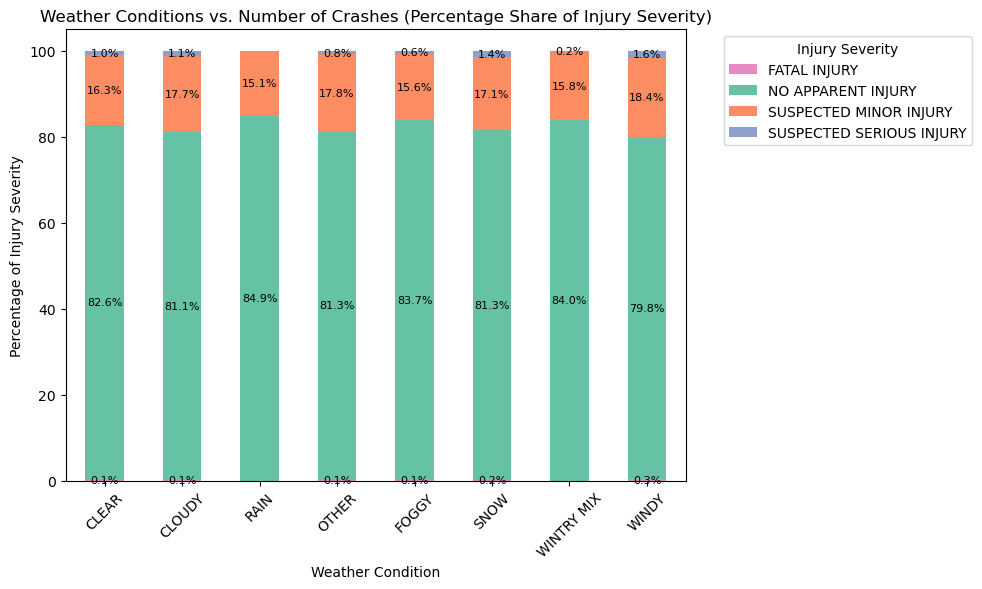

In [13]:
# Group the data by WEATHER CODE and INJURY SEVERITY to count the number of crashes in each combination
weather_injury_group = crash_data.groupby(['WEATHER CODE', 'Injury Severity']).size().unstack(fill_value=0)

# Calculate the total crashes for each weather condition
total_crashes_per_weather = weather_injury_group.sum(axis=1)

# Calculate the percentage share of each injury severity for each weather condition
weather_injury_percentage = weather_injury_group.div(total_crashes_per_weather, axis=0) * 100

# Define color mapping for each Injury Severity based on Injury Code or any preferred colors
colors = {
    'NO APPARENT INJURY': '#66c2a5',
    'SUSPECTED MINOR INJURY': '#fc8d62',
    'SUSPECTED SERIOUS INJURY': '#8da0cb',
    'FATAL INJURY': '#e78ac3'
}

# Plot the stacked bar chart with color coding
ax = weather_injury_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[colors[col] for col in weather_injury_percentage.columns])

# Customize the plot
plt.title('Weather Conditions vs. Number of Crashes (Percentage Share of Injury Severity)')
plt.xlabel('Weather Condition')
plt.ylabel('Percentage of Injury Severity')
plt.xticks(ticks=range(len(weather_injury_group.index)), labels=crash_data['Weather'].unique(), rotation=45)

# Add labels on bars
for weather_idx, weather in enumerate(weather_injury_percentage.index):
    cumulative_height = 0
    for injury_severity in weather_injury_percentage.columns:
        height = weather_injury_percentage.loc[weather, injury_severity]
        if height > 0:  # Add label only if the height is greater than 0
            ax.text(weather_idx, cumulative_height + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=8)
        cumulative_height += height

# Display the legend outside the plot
plt.legend(title="Injury Severity", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [14]:
# Group the data by INJURY SEVERITY and WEATHER CODE to count the number of crashes
injury_weather_group = crash_data.groupby(['Injury Severity', 'WEATHER CODE']).size().unstack(fill_value=0)

# Calculate the total crashes for each injury severity
total_crashes_per_injury = injury_weather_group.sum(axis=1)

# Calculate the percentage share of weather conditions for each injury severity
injury_weather_percentage = injury_weather_group.div(total_crashes_per_injury, axis=0) * 100

# Define color mapping for each Weather Condition (this could be based on hazard levels or any preferred colors)
colors = {
    0: '#66c2a5',   # CLEAR
    1: '#fc8d62',   # CLOUDY
    2: '#8da0cb',   # WINDY
    4: '#e78ac3',   # RAIN
    5: '#a6d854',   # OTHER
    6: '#ffd92f',   # FOGGY
    7: '#e5c494',  # SNOW
    8: '#b3b3b3'   # WINTRY MIX
}

# Plot the stacked bar chart with color coding based on weather condition
ax = injury_weather_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[colors[col] for col in injury_weather_percentage.columns])

# Customize the plot
plt.title('Injury Severity vs. Percentage of Weather Conditions')
plt.xlabel('Injury Severity')
plt.ylabel('Percentage of Weather Conditions')
plt.xticks(ticks=range(len(injury_weather_group.index)), labels=injury_weather_group.index, rotation=45)

# Display the legend outside the plot
plt.legend(title="Weather Condition", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

KeyError: 4

In [ ]:
import matplotlib.pyplot as plt

# Group by WEATHER CODE and INJURY CODE to count the number of crashes
crash_grouped = crash_data.groupby(['WEATHER CODE', 'INJURY CODE']).size().reset_index(name='Crash Count')

# Create a scale factor using the square of the INJURY CODE to represent severity
crash_grouped['Scale Factor'] = crash_grouped['INJURY CODE'] ** 2 * 50  # Adjust multiplier to control size

# Scatter plot with number of crashes on the Y-axis
plt.figure(figsize=(10, 6))
plt.scatter(crash_grouped['WEATHER CODE'], crash_grouped['Crash Count'], 
            alpha=0.6, c='blue', s=crash_grouped['Scale Factor'])

# Customize the plot
plt.title('Scatter Plot of Weather Hazard vs. Number of Crashes (Scaled by Injury Severity)')
plt.xlabel('Weather Hazard Code')
plt.ylabel('Number of Crashes')
plt.xticks(ticks=crash_grouped['WEATHER CODE'].unique(), 
           labels=crash_data['Weather'].unique(), rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Assuming crash_data has a 'Crash Date/Time' column
crash_data['Crash Date/Time'] = pd.to_datetime(crash_data['Crash Date/Time'])

# Group data by day and count crashes per day
daily_crashes = crash_data.groupby(crash_data['Crash Date/Time'].dt.date).size().reset_index(name='crashes')

# Rename columns for Prophet
daily_crashes.columns = ['ds', 'y']

# Initialize Prophet model
model = Prophet()

# Fit the model
model.fit(daily_crashes)

# Create a future dataframe (for the next 365 days)
future = model.make_future_dataframe(periods=365)

# Make predictions
forecast = model.predict(future)

# Display forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# Plot the forecast
model.plot(forecast)
plt.show()

# Plot the forecast components
model.plot_components(forecast)
plt.show()

In [ ]:
# Filter for serious and fatal injuries
serious_fatal_injuries = crash_data[crash_data['Injury Severity'].isin(['SUSPECTED MINOR INJURY','SUSPECTED SERIOUS INJURY', 'FATAL INJURY'])]

# Convert 'Crash Date/Time' to datetime if not already in datetime format
serious_fatal_injuries['Crash Date/Time'] = pd.to_datetime(serious_fatal_injuries['Crash Date/Time'])

# Group by date and count serious and fatal injuries
serious_fatal_daily = serious_fatal_injuries.groupby(serious_fatal_injuries['Crash Date/Time'].dt.date).size().reset_index(name='crashes')

# Rename columns to fit Prophet's requirements ('ds' for date, 'y' for value to predict)
serious_fatal_daily.columns = ['ds', 'y']

# Sort the data by date
serious_fatal_daily = serious_fatal_daily.sort_values(by='ds')

# Initialize the Prophet model
model = Prophet()

# Fit the model on the serious and fatal injuries data
model.fit(serious_fatal_daily)

# Create a future dataframe for predictions (e.g., forecast for the next 365 days)
future = model.make_future_dataframe(periods=365)

# Make predictions
forecast = model.predict(future)

# Display forecasted data
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# Plot the forecast
model.plot(forecast)
plt.title('Forecast of Serious and Fatal Injuries')
plt.xlabel('Date')
plt.ylabel('Predicted Number of Serious and Fatal Injuries')
plt.show()

# Plot the forecast components (trend, weekly, yearly seasonality)
model.plot_components(forecast)
plt.show()